# Analyzing Duplicates

This is a streamlined version of duplicates-dev.ipynb that is more paper ready.



In [1]:
from astropy.io import fits
from matplotlib import pyplot as plt
from astropy.table import Table
import os
import numpy as np
from scipy.stats import median_abs_deviation as MAD
%matplotlib inline

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153


/Users/rfinn/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


<Figure size 720x720 with 0 Axes>

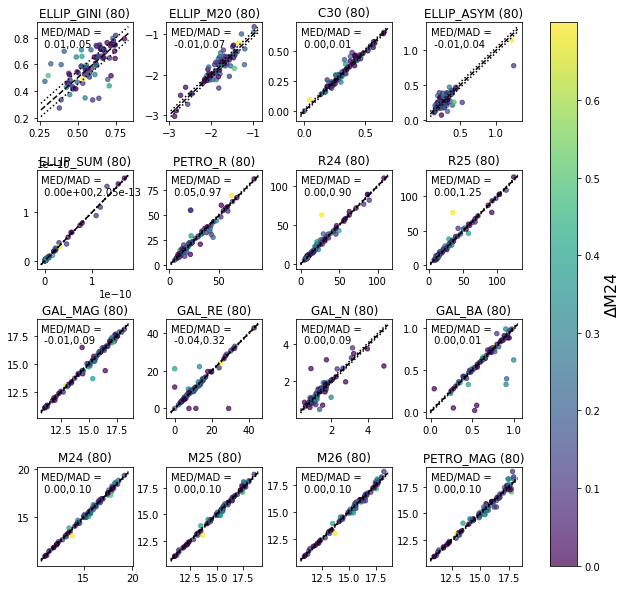

In [2]:
%matplotlib inline
%run ~/github/havirgo/python/duplicates.py
d.plot_rparams()
plt.show()

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153


<Figure size 432x288 with 0 Axes>

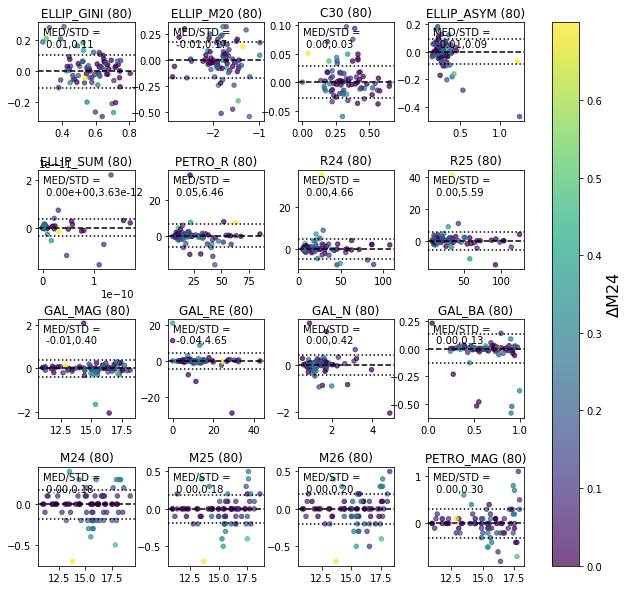

In [3]:
%run ~/github/havirgo/python/duplicates.py
d.plot_rparams_residuals()

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

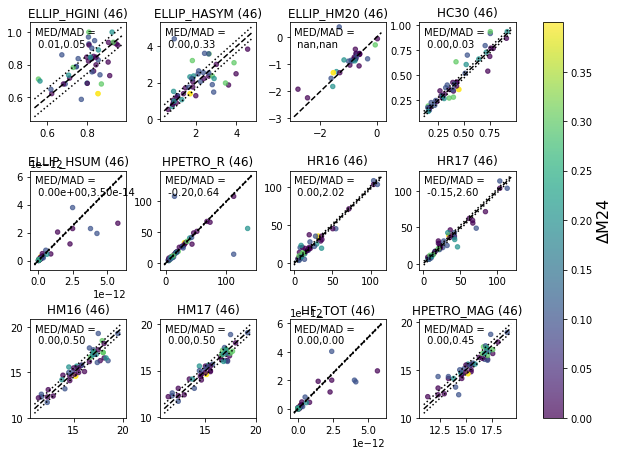

In [4]:
%run ~/github/havirgo/python/duplicates.py
d.plot_hparams()

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153


<Figure size 432x288 with 0 Axes>

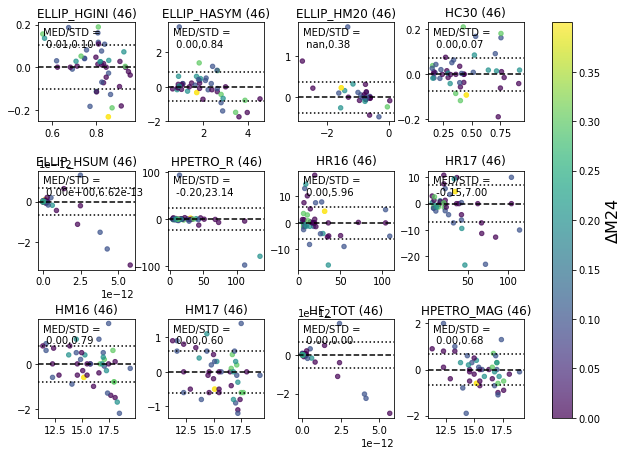

In [5]:
%run ~/github/havirgo/python/duplicates.py
d.plot_hparams_residuals()

# Compare STATMORPH Params

### R-band Results

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

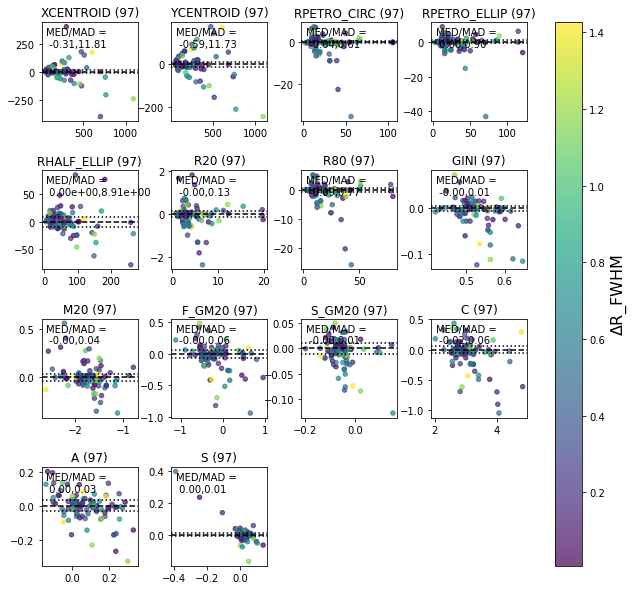

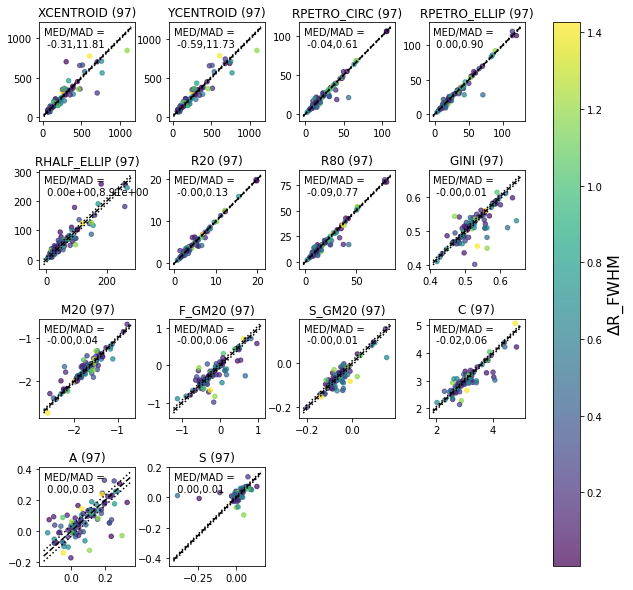

In [10]:
%run ~/github/havirgo/python/duplicates.py
d.plot_rstatmorph()

### Halpha Results

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

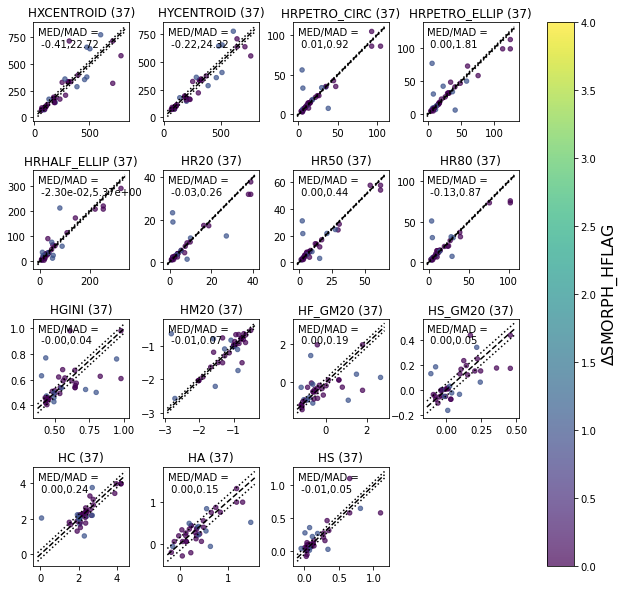

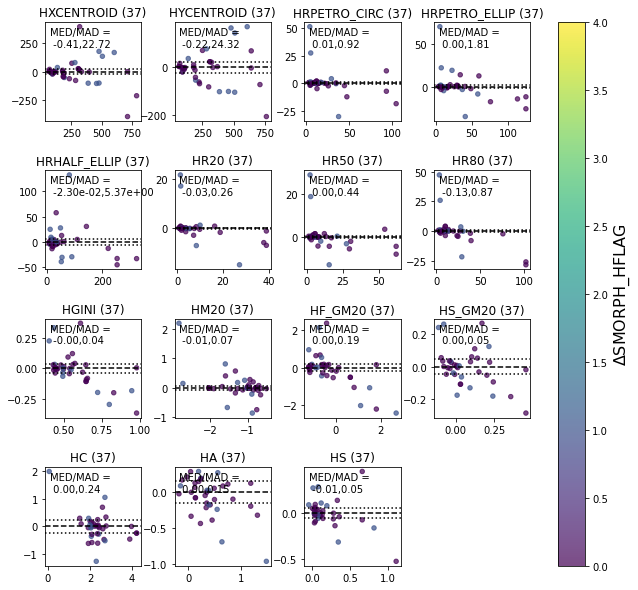

In [9]:
%run ~/github/havirgo/python/duplicates.py
d.plot_hstatmorph()

# TODOs

* why is M24, M25, M26 rounded to 0.1 mag?
* make seperate flags for galfit, sizes, mags, statmorph

In [24]:
4.14*(630+238)/60


59.89199999999999

In [23]:
2516/60


41.93333333333333

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153


<Figure size 720x720 with 0 Axes>

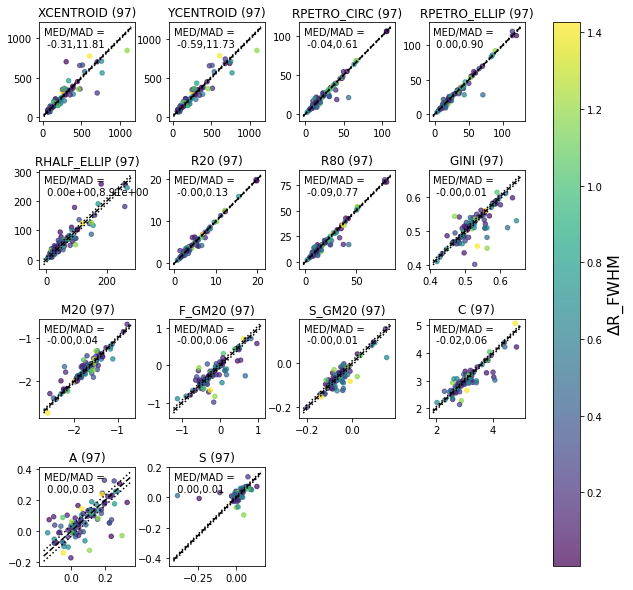

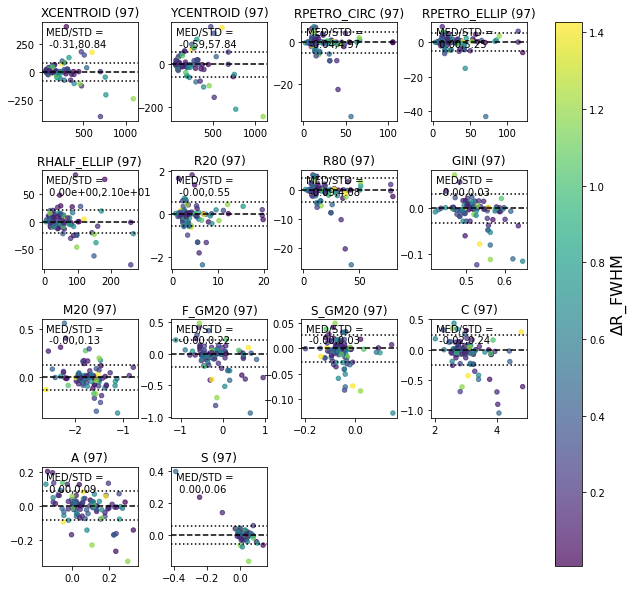

In [215]:
%run ~/github/havirgo/python/duplicates.py
d.plot_rstatmorph(rsmorphmaxflag=2)

* look at outliers individually to see why they are so different
* select better observation for FWHM, skynoise, filter correction

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

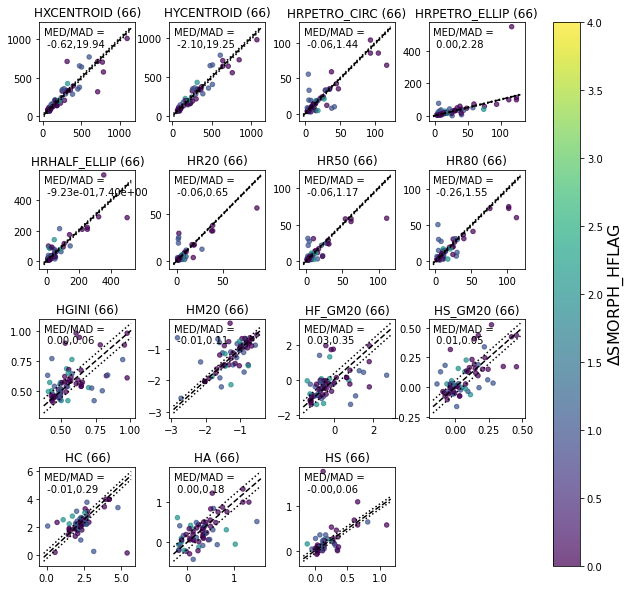

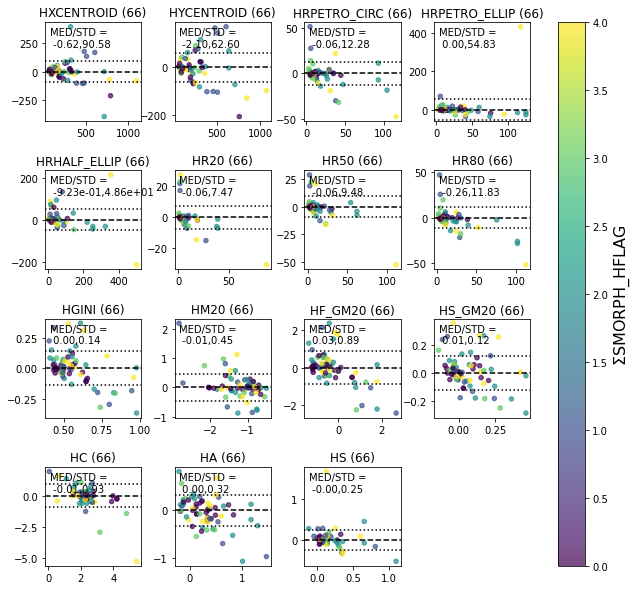

In [213]:
%run ~/github/havirgo/python/duplicates.py
d.plot_hstatmorph(hsmorphmaxflag=3)


number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

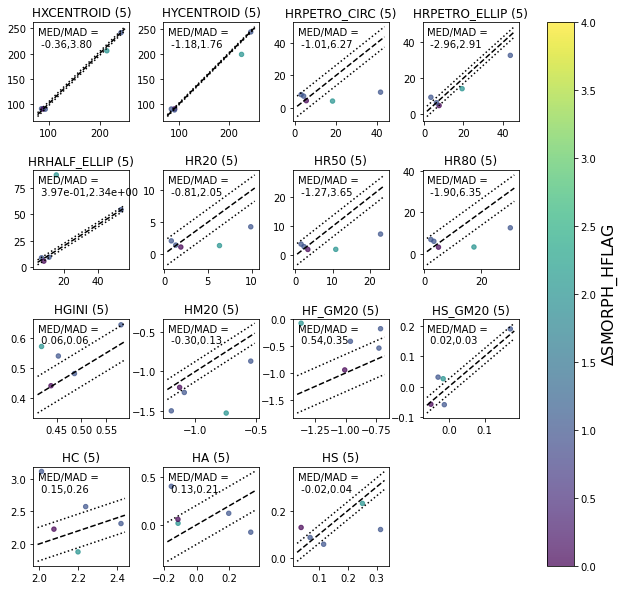

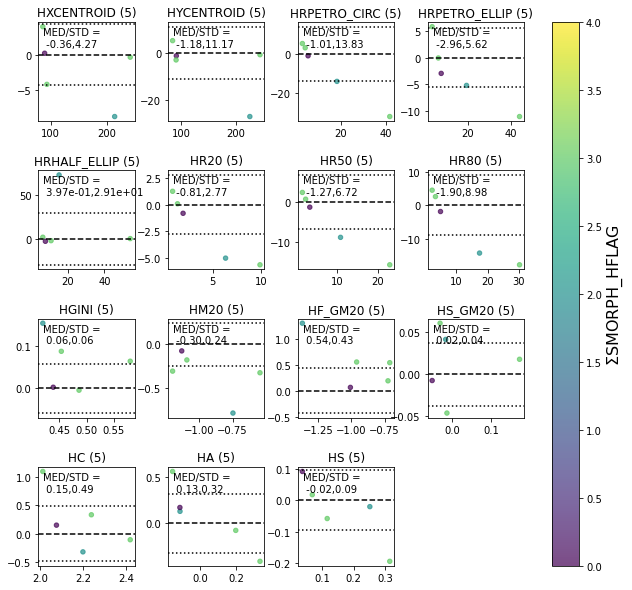

In [192]:
%run ~/github/havirgo/python/duplicates.py
d.plot_hstatmorph(hsmorphmaxflag=3,keep_tel='INT')


In [123]:
hflag = (d.htab['SMORPH_HFLAG'] < 3)& (d.htab['SMORPH_HXCENTROID'] >1)
print(f"number with good halpha statmorph = {np.sum(hflag)}")

rflag = (d.htab['SMORPH_FLAG'] < 1) & (d.htab['SMORPH_XCENTROID'] >1)
print(f"number with good rband statmorph = {np.sum(rflag)}")


print(f"number with good halpha AND rband statmorph = {np.sum(hflag & rflag)}")

number with good halpha statmorph = 559
number with good rband statmorph = 568
number with good halpha AND rband statmorph = 486


In [117]:
oddflag = hflag & ~rflag


In [118]:
d.htab['VFID','TEL'][oddflag]

VFID,TEL
bytes8,bytes3
VFID1793,BOK
VFID1807,BOK
VFID1807,BOK
VFID1957,BOK
VFID2144,HDI
VFID2165,BOK
VFID2591,BOK
VFID2615,INT
VFID2670,INT


In [72]:
d.htab['VFID','TEL'][hflag & rflag]

VFID,TEL
bytes8,bytes3
VFID0377,BOK
VFID0422,BOK
VFID0469,BOK
VFID0474,BOK
VFID0487,BOK
VFID0531,BOK
VFID0568,BOK
VFID0569,INT
VFID0569,BOK


In [119]:
i = d.htab['VFID'] == 'VFID0473'
d.htab['SMORPH_FLAG','SMORPH_HFLAG'][i]

SMORPH_FLAG,SMORPH_HFLAG
int32,int32
0,2
0,2


# Next Steps

* compare halpha-rband ratios for duplicates
  * R50 
  * R80
  * RMAX_ELLIP
  * RMAX_CIRC
  * flux ratio ellip
  * Gini
  * M20
  * CAS
  

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153

Number that meet r and halpha SMORPH flags = 31


<Figure size 432x288 with 0 Axes>

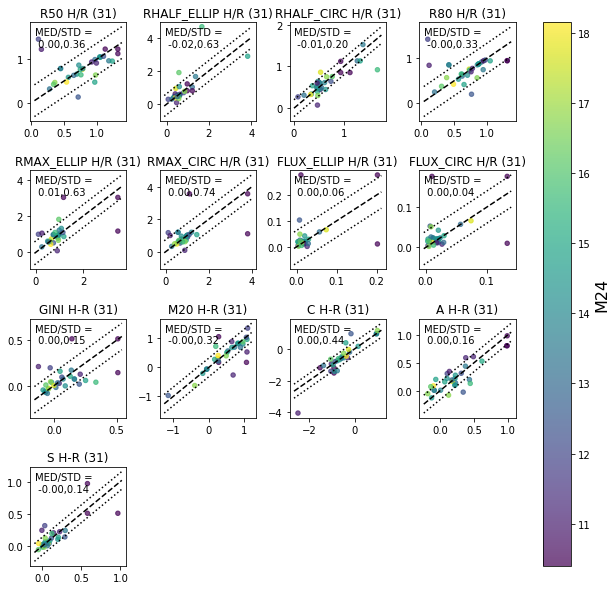

In [171]:
%run ~/github/havirgo/python/duplicates.py
d.compare_ratios(hsmorphmaxflag=2,rsmorphmaxflag=2)


number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153

Number that meet r and halpha SMORPH flags = 55


<Figure size 432x288 with 0 Axes>

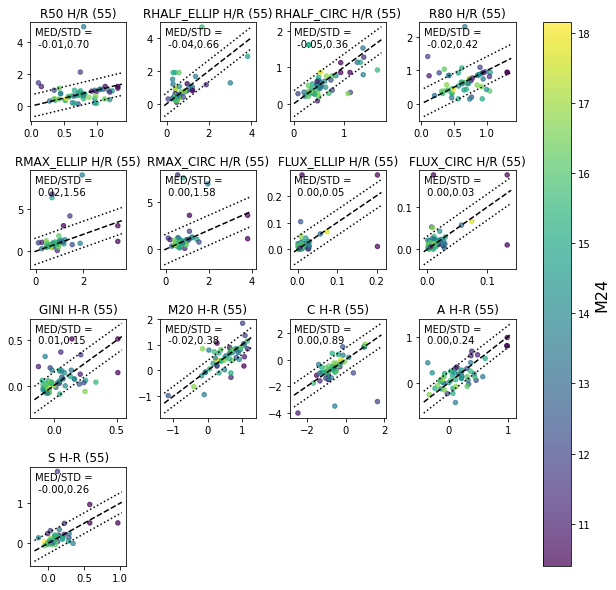

In [173]:
%run ~/github/havirgo/python/duplicates.py
d.compare_ratios(hsmorphmaxflag=3,rsmorphmaxflag=2)


# How to Handle Duplicates

* Once we make the statmorph cuts, we have 31 (flag cuts 2,2) or 55 (flag cuts 3,3) duplicates.
* Is it worth all the effort to keep these in the sample, vs go through and pick the best one?

* Let's look at a few and see if there is an obvious choice in terms of FWHM, depth, noise in image...

In [182]:
keepflag = flag[d.dupindex1] & flag[d.dupindex2]
dupindex1 = d.dupindex1[keepflag]
dupindex2 = d.dupindex2[keepflag]
for i in range(len(dupindex1)):
    print(f"{d.htab['TEL'][dupindex1[i]]}:{d.htab['H_FWHM'][dupindex1[i]]:.2f}, {d.htab['TEL'][dupindex2[i]]}:{d.htab['H_FWHM'][dupindex2[i]]:.2f}")

BOK:1.62, INT:1.27
INT:1.27, BOK:1.62
INT:1.20, BOK:2.00
BOK:1.99, INT:1.35
HDI:1.88, BOK:1.59
HDI:1.88, BOK:1.59
HDI:1.88, BOK:1.59
HDI:1.88, BOK:1.59
BOK:1.86, INT:1.73
BOK:1.70, BOK:1.67
HDI:1.71, BOK:1.46
BOK:1.46, HDI:1.71
BOK:1.44, BOK:1.39
BOK:1.44, BOK:1.39
BOK:1.39, BOK:1.44
BOK:1.39, BOK:1.44
BOK:1.39, BOK:1.44
BOK:1.39, HDI:1.32
BOK:1.39, BOK:1.44
HDI:1.32, BOK:1.44
BOK:1.39, HDI:1.32
BOK:1.39, BOK:1.44
HDI:1.32, BOK:1.44
BOK:1.44, HDI:1.32
HDI:2.37, BOK:1.61
HDI:2.37, BOK:1.61
HDI:2.37, HDI:1.99
BOK:1.61, HDI:1.99
HDI:2.37, BOK:1.61
BOK:1.61, HDI:2.37
BOK:1.61, HDI:2.37
BOK:1.61, HDI:2.37
BOK:1.61, HDI:2.29
HDI:2.37, HDI:2.29
BOK:1.61, HDI:2.29
HDI:2.29, HDI:1.32
HDI:2.29, BOK:1.61
HDI:1.32, BOK:1.61
INT:2.22, BOK:2.41
INT:2.22, BOK:2.41
HDI:1.95, BOK:1.52
INT:2.34, BOK:1.74
BOK:1.74, INT:2.34
INT:1.08, HDI:2.37
INT:1.11, INT:1.11
INT:1.18, BOK:1.56
BOK:1.69, HDI:1.45
BOK:1.69, BOK:1.55
HDI:1.45, BOK:1.55
HDI:1.45, BOK:1.69
HDI:1.57, INT:1.45
HDI:1.57, INT:1.45
HDI:2.52, IN

# Merging with Full Catalog

In [206]:
%run ~/github/havirgo/python/duplicates.py
d.remove_duplicates()

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153

VFID0473

		 Winner by filter correction =  VF-257.395+61.089-BOK-20220424-VFID0483

VFID0481



/Users/rfinn/github/havirgo/python/duplicates.py:456: RuntimeWarning: divide by zero encountered in log10
  rskynoise.append(np.log10(ftab['R_SKYNOISE'][i]))
/Users/rfinn/github/havirgo/python/duplicates.py:457: RuntimeWarning: divide by zero encountered in log10
  hskynoise.append(np.log10(ftab['H_SKYNOISE'][i]))


		 Winner by filter correction =  VF-257.395+61.089-BOK-20220424-VFID0483

VFID0483

		 Winner by filter correction =  VF-257.395+61.089-BOK-20220424-VFID0483

VFID0569

		 Winner by filter correction =  VF-235.203+59.547-BOK-20220424-VFID0607

VFID0782

		 Winner by filter correction =  VF-266.477+58.350-BOK-20220423-VFID0783

VFID1587

		 Winner by image quality =  VF-202.713+46.868-BOK-20210315-VFID1573

VFID1588

listofwinners =  [77, 77, 77, 78, 77, 78]
		 Overall winner by mode  VF-202.276+46.486-HDI-20170523-p023

VFID1589

		 Winner by image quality =  VF-202.713+46.868-BOK-20210315-VFID1573

VFID1593

		 Winner by image quality =  VF-202.713+46.868-BOK-20210315-VFID1573

VFID1595

		 Winner by image quality =  VF-202.713+46.868-BOK-20210315-VFID1573

VFID1604

		 Winner by image quality =  VF-202.713+46.868-BOK-20210315-VFID1573

VFID1605

listofwinners =  [88, 89, 88, 88, 89, 88, 89]
		 Overall winner by mode  VF-202.276+46.486-HDI-20170523-p023

VFID1726

		 Winner by image 